# Práctica PGD 2022 : Luis ROSARIO TREMOULET

## **Introducción**

Los ejemplos adversarios (Adversarial Examples - AE) en redes neuronales han puesto recientemente en duda la robustez de dichas funciones, al ser capaces de cambiar la predicción de una red sin más que perturbar mínimamente los datos de entrada.


El modelo de ataque se describe como la adición de una pertubación:
$$
x_{adv} = x + \delta.    % \text{ donde } \delta =  \epsilon \cdot sign \left( \frac{\partial \mathcal{L}(y_{target},\hat{y})}{\partial x} \right).
$$
El ***problema de optimización*** a resolver es por tanto:
$$
\begin{equation}
\text{P1}:=\left\{
\begin{aligned}
\delta^* = \mbox{arg}\max_{\delta \in \Delta} \mathcal{L}(y,f(x  + \delta, \theta)), \\ ~\text{donde}~\Delta = \lbrace \delta: ||\delta||_{\infty} \leq \epsilon \rbrace
\end{aligned} \right.
\end{equation}
$$

Es decir, buscamos la perturbación $\delta$ de tal forma que la predicción hecha por la red sea distinta a la original: 
$$
\hat{y} = f(x, \theta) \neq \hat{y}_{adv} = f(x_{adv}, \theta)
$$

# **Fast Gradient Sign Method - FGSM**

En la práctica [Adversarial Examples](https://github.com/rollervan/FunMat/blob/main/Codes/Pr%C3%A1ctica_Adversarial_Examples.ipynb) vimos una posible resolución de problema anterior $\text{P1}$, usando el método FGSM ([Explaining and Harnessing
Adversarial Examples](https://arxiv.org/pdf/1412.6572.pdf)). Vimos que este método puede usarse para crear ejemplos adversarios dirigidos y no dirigidos:

1. forzando a que la función de pérdidas minimize una etiqueta distinta (si hablamos de clasificación), a esto se le conoce como *targeted AE*
$$
\text{Targeted: }x_{adv} = x - \epsilon \cdot sign \left( \frac{\partial \mathcal{L}(y_{target},\hat{y})}{\partial x} \right)
$$

2. forzando a que la función de pérdidas aumente, *non-targeted AE*. 

$$
\text{Non-Targeted: } x_{adv} = x + \epsilon \cdot sign \left( \frac{\partial \mathcal{L}(y,\hat{y})}{\partial x} \right)
$$

Los ejemplos adversarios se construyen con una sola llamada al gradiente (fast) y tomando el signo de éste (sign); de ahí su nombre.

% Dicho de otra manera, buscamos una perturbación en cada píxel que no sea mayor que $\epsilon$, de manera que $x + \delta$, maximice la pérdida, y, en consecuencia, cambie la predicción del modelo. Este modelo de ataque se conoce como Projected Gradient Descend (PGD), nombre no muy acertado ya que el PGD es ya un método conocido de optimización.

# **Projected Gradient Descent - PGD**

En esta práctica nos centraremos en un ataque no dirigido (*Non-targeted attack*). Para ello, analizamos el problema $\text{P1}$ un poco más en detalle. Se trata de encontar la perturbación $\delta$ que maximiza la pérdida:
$$
    \begin{equation}
        \delta^{*} = \mbox{arg}\max_{\delta \in \Delta} \mathcal{L}(y, f(\theta,x+\delta))
    \end{equation}
$$
en un conjunto restringido de posibles perturbaciones $\Delta$:
\begin{equation}
    \Delta := \lbrace \delta: ||\delta||_{\infty} \leq \epsilon \rbrace.
\end{equation}

Es decir, se busca $\delta^*$ que maximiza la pérdida $\mathcal{L}$ con la restricción de que $\delta \in \Delta$ tenga una norma infinito menor que cierto valor $\epsilon$.

Intuitivamente, esto significa que cada píxel de la imagen puede ser modificado hasta un cierto $\epsilon$. Por ejemplo, si el valor de un píxel es 0.5, y $\epsilon=0.1$, el rango de posibles valores de $\delta$ sería $[-0.1, 0.1]$ y por tanto, el rango de posibles valores del píxel sería $[0.4, 0.6]$.

Para la resolución del problema $\text{P1}$ se pueden usar distintos métodos de optimización. Entre los más usados está el Projected Gradient Descent (PGD), que es un método de optimización en sí, no un tipo de ataque, aunque al ataque se le conoce con el mismo nombre.


# **En esta práctica se pide:**

Como ingenierx de visión, se te encomienda implementar un ataque no dirigido para evaluar la robustez de un sistema de clasificación que consiste en una red neuronal. Para ello, se te indica que existe un método que se llama PGD para encontrar una perturbación óptima $\ell_\infty$. Esta es, a priori, toda la información que tienes para resolver lo que se te pide, es decir, nunca has usado dicho método.

Para ello deberás:


**E1:**

* Encontrar información (paper) de referencia en el que se propone el uso de este método. Justificar el paper que has seleccionado (relevancia, código, citas...). ¿Por qué usar este paper y no otro?

**Respuesta 1:** 

Dos papers me han ayudado a resolver este problema.

Primer paper : [Robustness May Be at Odds with Accuracy](https://arxiv.org/pdf/1805.12152.pdf), lo he elegido porque es bastante reciente (versión 5 del 9 septiembre 2019) y sobre todo los autores son del MIT. También usa la misma base de datos que hemos visto en clase (CIFAR-10). Se entiende muy bien la idea "general" de los ataques adversarios.

Segundo paper : [Towards Deep Learning Models Resistant to Adversarial
Attacks](https://arxiv.org/pdf/1706.06083.pdf), este paper también ha sido propuesto por personas del MIT (2 autores en commun con el primer paper). Este paper es más detallado comparado con el primero, habla mucho mas de FGSM y sobre todo de PGD.

Auque no sea un paper tambien me ha ayudado mucho esta página (sobre todo la parte PGD) [Adversarial examples, solving the inner maximization](https://adversarial-ml-tutorial.org/adversarial_examples/). Todo esta muy bien explicado y además con código.

**E2:**

*  Explicar cómo se resuelve con un PGD el problema $\text{P1}$. Puedes usar un pseudo-código comentando qué significa cada paso.

**Respuesta 2**:

El ataque "Projected Gradient Descent" (PGD) es un ataque de caja blanca, lo que significa que el atacante tiene acceso a los gradientes del modelo, es decir, el atacante tiene una copia de los pesos de su modelo. Este modelo de amenaza da al atacante mucho más poder que los ataques de caja negra, ya que puede elaborar específicamente su ataque para engañar a su modelo sin tener que depender de los ataques de transferencia que a menudo resultan en perturbaciones visibles para el ojo humano.

El PGD trata de encontrar la perturbación que maximiza la pérdida de un modelo en una entrada particular mientras se mantiene el tamaño de la perturbación más pequeño que una cantidad especificada referida como epsilon.

El algoritmo de PGD se puede resumir con los 5 pasos siguientes, aunque el atacante es libre de aplicar cualquier mejora de optimización, como el impulso, Adam, múltiples reinicios, etc :



1.   (Opcional) Añadir una perturbación aleatoria en la imagen
2.   Obtener el gradiente de la imagen, teniendo en cuenta la etiqueta de la imagen y la que se tiene que maximizar o minimizar (dependiendo si hacemos un ataque dirigido o no)
3.   Para cada píxel, dar un paso de tamaño α de signo de su gradiente (se obtiene la perturbación)
4.   Sumar (o restar) la perturbatión (dependiendo si hacemos un ataque dirigido o no)
5.   Aplicar la restricción de $\epsilon$ (cada píxel de la imagen puede ser modificado hasta un cierto $\epsilon$ )
6.   Repetir las etapas 2-3-4-5 n veces (número de iteraciones).



**E3:**

* Implementar en TensorFlow un ejemplo de ataque PGD $\ell_{\inf}$ con $100$ iteraciones y $\epsilon=0.05$.

**Respuesta 3:** Código

In [ ]:
# Completar. Para ello necesitarás entrenar una red y luego implementar el ataque. 
# Puedes usar la práctica de Ejemplos Adversarios vista en clase y adaptar el
# FGSM para usar el PGD

### 3.0) Imports

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

### 3.1) Selección de datos

In [3]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

num_classes = 10

170508288/170498071 [==============================] - 2s 0us/step


### 3.2) Red que servira para probar el ataque

In [4]:
model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(64, kernel_size=5, strides=(2, 2), activation=tf.nn.relu),
                              tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                              tf.keras.layers.Conv2D(128, kernel_size=3, strides=(1, 1), activation=tf.nn.relu),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
                              tf.keras.layers.Dense(num_classes, name='logits', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
 ])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Accuracy : ', test_acc)

Epoch 1/10
313/313 [==============================] - 50s 154ms/step - loss: 1.6930 - accuracy: 0.4155 - val_loss: 1.5024 - val_accuracy: 0.4826
Epoch 2/10
313/313 [==============================] - 42s 133ms/step - loss: 1.3559 - accuracy: 0.5418 - val_loss: 1.2557 - val_accuracy: 0.5848
Epoch 3/10
313/313 [==============================] - 33s 105ms/step - loss: 1.2158 - accuracy: 0.5952 - val_loss: 1.1842 - val_accuracy: 0.6145
Epoch 4/10
313/313 [==============================] - 34s 108ms/step - loss: 1.1133 - accuracy: 0.6398 - val_loss: 1.1654 - val_accuracy: 0.6282
Epoch 5/10
313/313 [==============================] - 34s 107ms/step - loss: 1.0400 - accuracy: 0.6682 - val_loss: 1.1031 - val_accuracy: 0.6492
Epoch 6/10
313/313 [==============================] - 32s 103ms/step - loss: 0.9774 - accuracy: 0.6916 - val_loss: 1.0624 - val_accuracy: 0.6665
Epoch 7/10
313/313 [==============================] - 32s 104ms/step - loss: 0.9235 - accuracy: 0.7169 - val_loss: 1.0466 - val_ac

### 3.4) Seleccionamos una imagen del conjunto de test

Text(0.5, 1.0, 'Label: [[3]]')

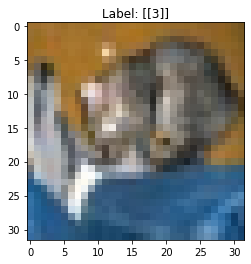

In [5]:
x = test_images[0:1,...]
y = test_labels[0:1,...]
x.shape
plt.imshow(x[0,...])
plt.title('Label: '+str(y))

###  3.5) Ataque PGD $\ell_{\inf}$ con $100$ iteraciones y $\epsilon=0.05$. (No dirigido)

In [42]:
ep = 0.05
alpha = 1e-2
iter = 100
noise = True

x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

if noise:
  noise = tf.random.uniform(shape=tf.shape(x), maxval=ep, minval=-ep, dtype=tf.float32)
  x_adv = tf.add(x, noise)
else:
  x_adv = x

for i in range(iter):
  with tf.GradientTape() as g:
      g.watch(x_adv)
      y_pred = model(x_adv)
      loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred, from_logits=True)
    
  grad = g.gradient(loss, x_adv)
  pert = tf.sign(grad)
  pert *= alpha
  #x_adv = x_adv + ep*pert
  x_adv = tf.clip_by_value(x_adv + pert, x-ep, x+ep) # Only the values below x-ep or above x+ep are changed

### 3.6) Resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Pert')

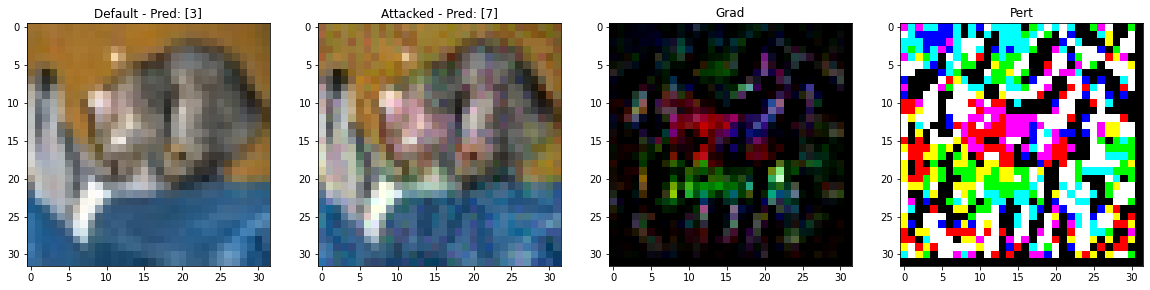

In [43]:
fig, axs = plt.subplots(1,4,figsize=(20,20))

pred_x = tf.argmax(model(x),-1).numpy()
axs[0].imshow(x[0,...].numpy())
axs[0].set_title('Default - Pred: '+str(pred_x))

pred_x_adv = tf.argmax(model(x_adv),-1).numpy()
axs[1].imshow(x_adv[0,...].numpy())
axs[1].set_title('Attacked - Pred: '+str(pred_x_adv))

grad_scaled = grad[0,...].numpy() / grad[0,...].numpy().max()
axs[2].imshow(grad_scaled)
axs[2].set_title('Grad')

axs[3].imshow(pert[0,...].numpy()/alpha)
axs[3].set_title('Pert')

### 3.7) "Bonus" Mismo ataque PGD pero dirigido

In [44]:
ep = 0.05
alpha = 1e-2
iter = 100
noise = True
class_dirig = 9

x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

if noise:
  noise = tf.random.uniform(shape=tf.shape(x), maxval=ep, minval=-ep, dtype=tf.float32)
  x_adv = tf.add(x, noise)
else:
  x_adv = x

for i in range(iter):
  with tf.GradientTape() as g:
      g.watch(x_adv)
      y_pred = model(x_adv)
      loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=class_dirig, y_pred=y_pred, from_logits=True)
    
  grad = g.gradient(loss, x_adv)
  pert = tf.sign(grad)
  pert *= alpha
  #x_adv = x_adv + ep*pert
  x_adv = tf.clip_by_value(x_adv - pert, x-ep, x+ep) # Only the values below x-ep or above x+ep are changed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Pert')

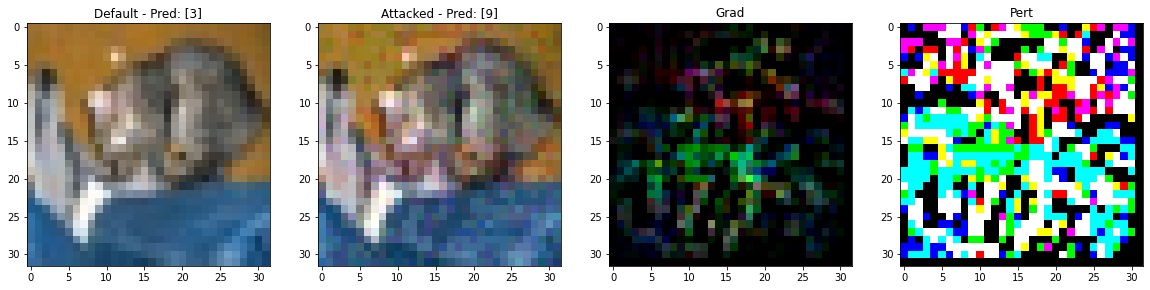

In [45]:
fig, axs = plt.subplots(1,4,figsize=(20,20))

pred_x = tf.argmax(model(x),-1).numpy()
axs[0].imshow(x[0,...].numpy())
axs[0].set_title('Default - Pred: '+str(pred_x))

pred_x_adv = tf.argmax(model(x_adv),-1).numpy()
axs[1].imshow(x_adv[0,...].numpy())
axs[1].set_title('Attacked - Pred: '+str(pred_x_adv))

grad_scaled = grad[0,...].numpy() / grad[0,...].numpy().max()
axs[2].imshow(grad_scaled)
axs[2].set_title('Grad')

axs[3].imshow(pert[0,...].numpy()/alpha)
axs[3].set_title('Pert')

**E4:** Código (para nota)

* Implementar en TensorFLow un ejemplo de ataque PGD $\ell_1$ y comparar con el anterior.




In [ ]:
# Completar. En el ataque anterior, la restricción sobre el conjunto de perturbaciones
# es que la norma infinito sea menor que un cierto valor epsilon. Existen otros
# ataques en los que esta norma no es la norma infinito. Repite el proceso de
# entender qué hay que cambiar en el código para hacer uso de la norma 1 y 
# compara/explica las diferencias con el anterior.

### 4.1) Ataque PGD $\ell_1$ con $100$ iteraciones y $\epsilon=0.05$. (No dirigido)

In [46]:
ep = 0.05
alpha = 1e-2
iter = 100
noise = False

x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

if noise:
  noise = tf.random.uniform(shape=tf.shape(x), maxval=ep, minval=-ep, dtype=tf.float32)
  x_adv = tf.add(x, noise)
else:
  x_adv = x

for i in range(iter):
  with tf.GradientTape() as g:
      g.watch(x_adv)
      y_pred = model(x_adv)
      loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred, from_logits=True)
    
  grad = g.gradient(loss, x_adv)
  abs = tf.math.abs(grad)
  max_grad = tf.reduce_max(abs, [1, 2, 3], keepdims=True)
  
  equal_abs = tf.math.equal(abs, max_grad) # Returns the truth value of (x == y) element-wise.
  equal_abs = tf.cast(equal_abs, dtype=tf.float32)
  
  added_abs = tf.math.reduce_sum(equal_abs, [1, 2, 3], keepdims=True)
    
  pert = tf.sign(grad)
  #pert *= alpha
  x_adv += pert * equal_abs / added_abs
  x_adv = tf.clip_by_value(x_adv, x-ep, x+ep) # Only the values below x-ep or above x+ep are changed


### 4.2) Resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Pert')

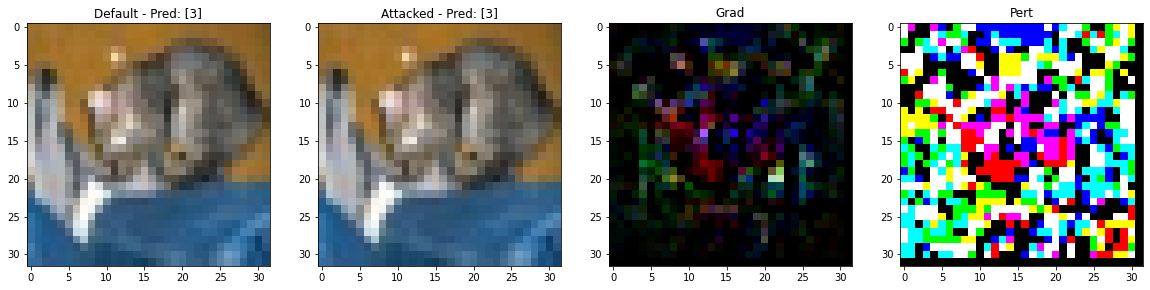

In [47]:
fig, axs = plt.subplots(1,4,figsize=(20,20))

pred_x = tf.argmax(model(x),-1).numpy()
axs[0].imshow(x[0,...].numpy())
axs[0].set_title('Default - Pred: '+str(pred_x))

pred_x_adv = tf.argmax(model(x_adv),-1).numpy()
axs[1].imshow(x_adv[0,...].numpy())
axs[1].set_title('Attacked - Pred: '+str(pred_x_adv))

grad_scaled = grad[0,...].numpy() / grad[0,...].numpy().max()
axs[2].imshow(grad_scaled)
axs[2].set_title('Grad')

axs[3].imshow(pert[0,...].numpy()/alpha)
axs[3].set_title('Pert')

### 4.3) Respuesta

#### Respuesta

Se puede ver que el resultado no es bueno (el modelo sigue encontrando la buena clase). Como se puede leer en este paper : [ATTACKING THE MADRY DEFENSE MODEL WITH L1-BASED ADVERSARIAL EXAMPLES](https://openreview.net/pdf?id=Sy8WeUJPf), con un epsilon más grande la red debería equivocarse (pero la imagen resultaría ser más "dañada").

### 4.4) Subiendo el epsilon

In [49]:
ep = 0.4
alpha = 1e-2
iter = 100
noise = True

x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

if noise:
  noise = tf.random.uniform(shape=tf.shape(x), maxval=ep, minval=-ep, dtype=tf.float32)
  x_adv = tf.add(x, noise)
else:
  x_adv = x

for i in range(iter):
  with tf.GradientTape() as g:
      g.watch(x_adv)
      y_pred = model(x_adv)
      loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred, from_logits=True)
    
  grad = g.gradient(loss, x_adv)
  abs = tf.math.abs(grad)
  max_grad = tf.reduce_max(abs, [1, 2, 3], keepdims=True)
  
  equal_abs = tf.math.equal(abs, max_grad) # Returns the truth value of (x == y) element-wise.
  equal_abs = tf.cast(equal_abs, dtype=tf.float32)
  
  added_abs = tf.math.reduce_sum(equal_abs, [1, 2, 3], keepdims=True)
    
  pert = tf.sign(grad)
  #pert *= alpha
  x_adv += pert * equal_abs / added_abs
  x_adv = tf.clip_by_value(x_adv, x-ep, x+ep) # Only the values below x-ep or above x+ep are changed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Pert')

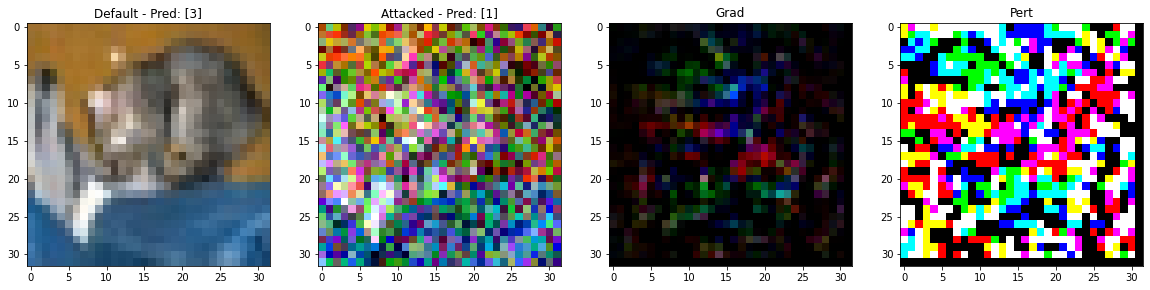

In [50]:
fig, axs = plt.subplots(1,4,figsize=(20,20))

pred_x = tf.argmax(model(x),-1).numpy()
axs[0].imshow(x[0,...].numpy())
axs[0].set_title('Default - Pred: '+str(pred_x))

pred_x_adv = tf.argmax(model(x_adv),-1).numpy()
axs[1].imshow(x_adv[0,...].numpy())
axs[1].set_title('Attacked - Pred: '+str(pred_x_adv))

grad_scaled = grad[0,...].numpy() / grad[0,...].numpy().max()
axs[2].imshow(grad_scaled)
axs[2].set_title('Grad')

axs[3].imshow(pert[0,...].numpy()/alpha)
axs[3].set_title('Pert')